In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

In [3]:
link='https://drive.google.com/file/d/1eWwCleFx9L4nhcD4tSlN1IP7A-1g7omF/view?usp=share_link'
import pandas as pd
id=link.split("/")[-2]

downloaded=drive.CreateFile({'id':id})
downloaded.GetContentFile('Rainfall dataset.csv')

df=pd.read_csv('Rainfall dataset.csv')
print(df)



              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

In [4]:
data=pd.read_csv('Rainfall dataset.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
#Data Preprocessing
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
# Shape of the data frame
df.shape

(145460, 23)

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


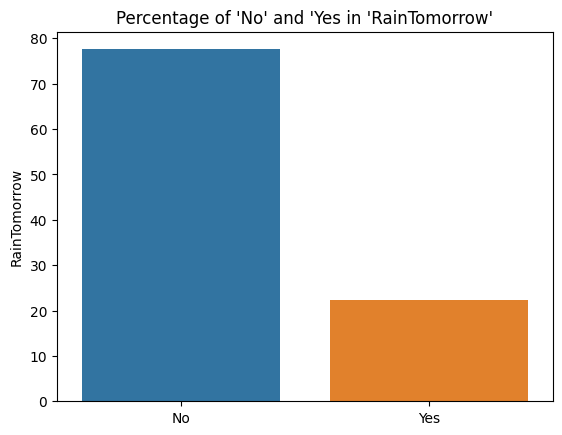

In [10]:
#Counting the Count of 'NO' and 'YES' from the column RainTomorrow 
RT = df["RainTomorrow"].value_counts(normalize = True)

sns.barplot(x = RT.index, y = RT*100).set_title("Percentage of 'No' and 'Yes in 'RainTomorrow'");

<ipython-input-11-763f2f2b1909>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols], kde = False, bins = 20);


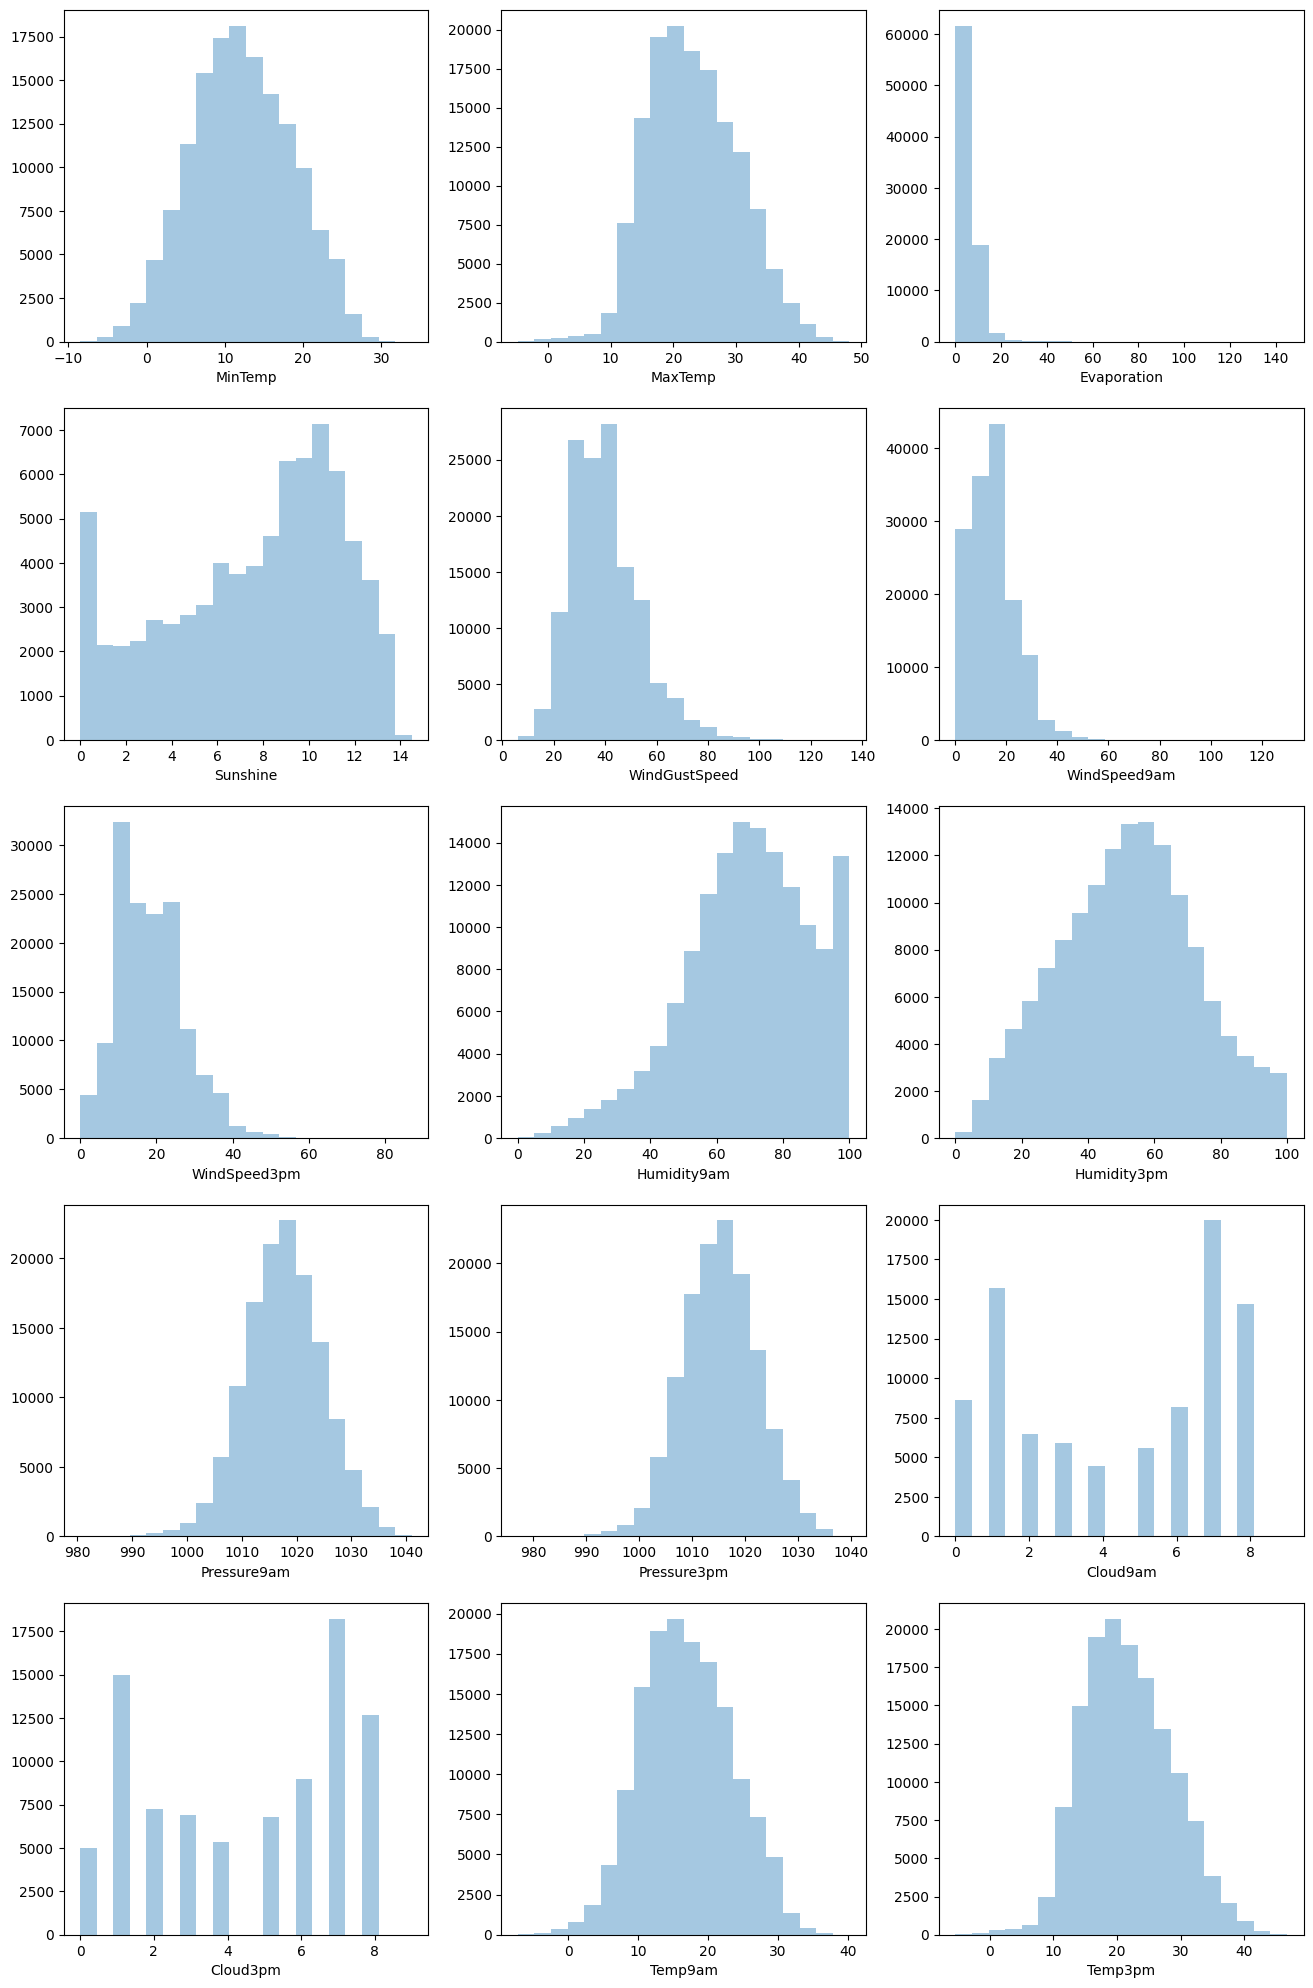

In [11]:
n_rows=5
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols);
fig.set_size_inches((16, 25))

#Considering the columns which are useful for evaluation 
dt = df.iloc[:, [2, 3, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

for i, column in enumerate(dt.columns):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols], kde = False, bins = 20);

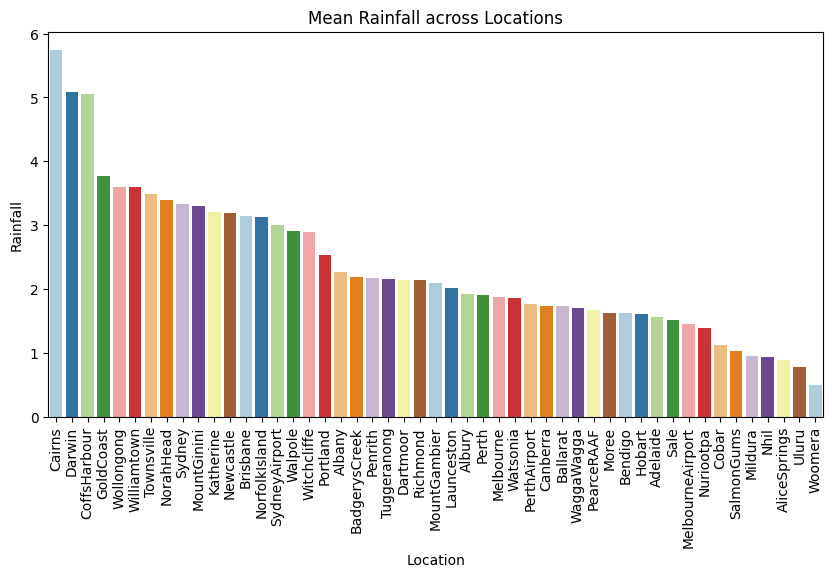

In [12]:
RF_loc = df.groupby('Location')["Rainfall"].mean().sort_values(ascending = False)

fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)
sns.barplot(x = RF_loc.index, y = RF_loc,
            palette = sns.color_palette("Paired")).\
            set_title("Mean Rainfall across Locations");

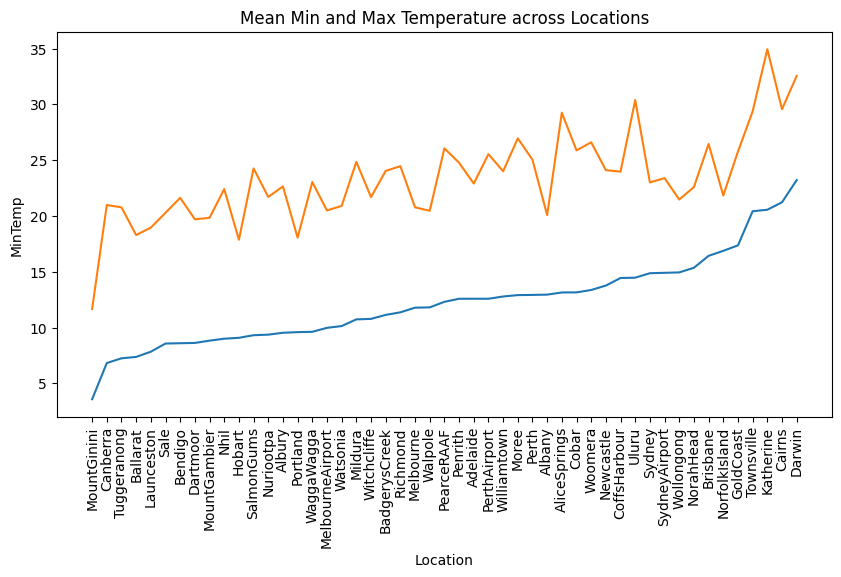

In [13]:
MinTemp_loc = df.groupby('Location')["MinTemp"].mean().sort_values()
MaxTemp_loc = df.groupby('Location')["MaxTemp"].mean().sort_values()

fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)
sns.lineplot(x = MinTemp_loc.index, y = MinTemp_loc);
sns.lineplot(x = MaxTemp_loc.index, y = MaxTemp_loc).\
            set_title("Mean Min and Max Temperature across Locations");

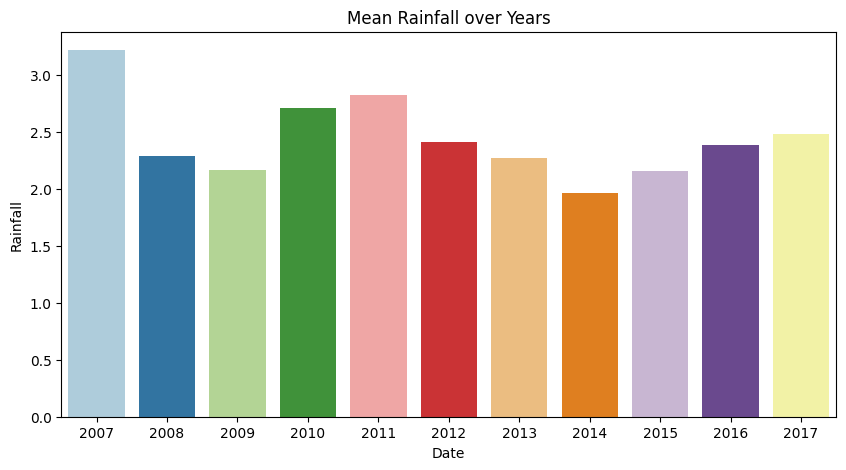

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
RF_year = df.groupby(df['Date'].dt.year)['Rainfall'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.barplot(x = RF_year.index, y = RF_year, 
            palette = sns.color_palette("Paired")).\
            set_title("Mean Rainfall over Years");

<ipython-input-15-fca083acb5ff>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = MinTemp_year.index, y = MinTemp_year,


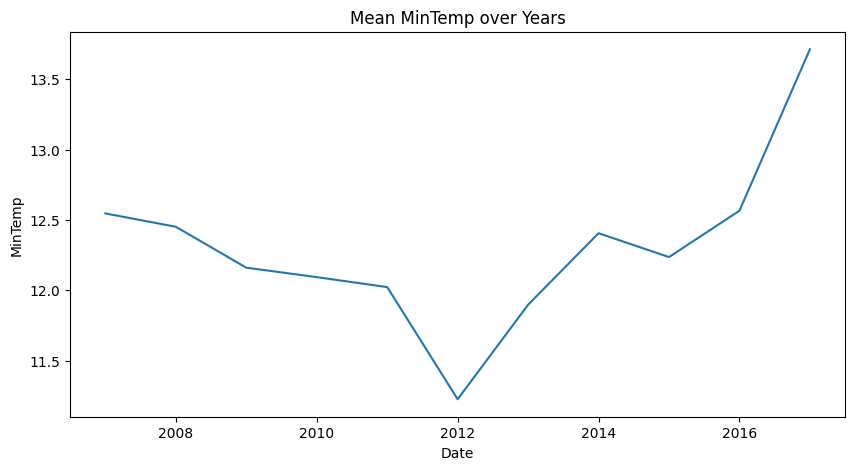

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
MinTemp_year = df.groupby(df['Date'].dt.year)['MinTemp'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.lineplot(x = MinTemp_year.index, y = MinTemp_year,  
            palette = sns.color_palette("Paired")).\
            set_title("Mean MinTemp over Years");

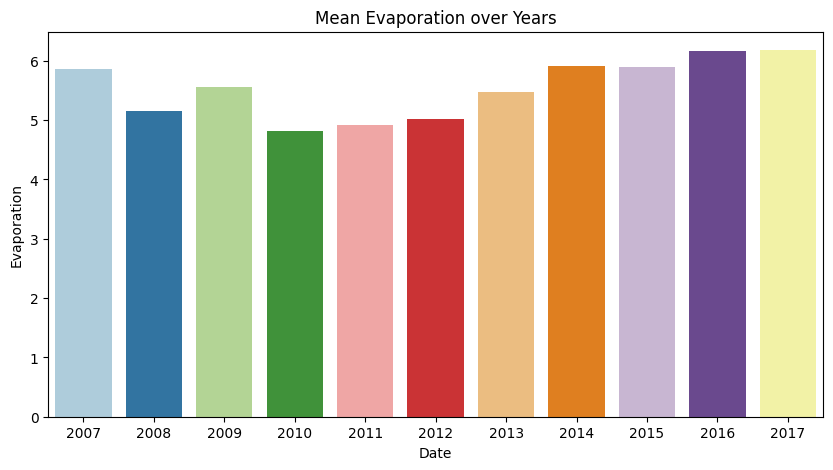

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
Ev_year = df.groupby(df['Date'].dt.year)['Evaporation'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.barplot(x = Ev_year.index, y = Ev_year,
            palette = sns.color_palette("Paired")).\
            set_title("Mean Evaporation over Years");

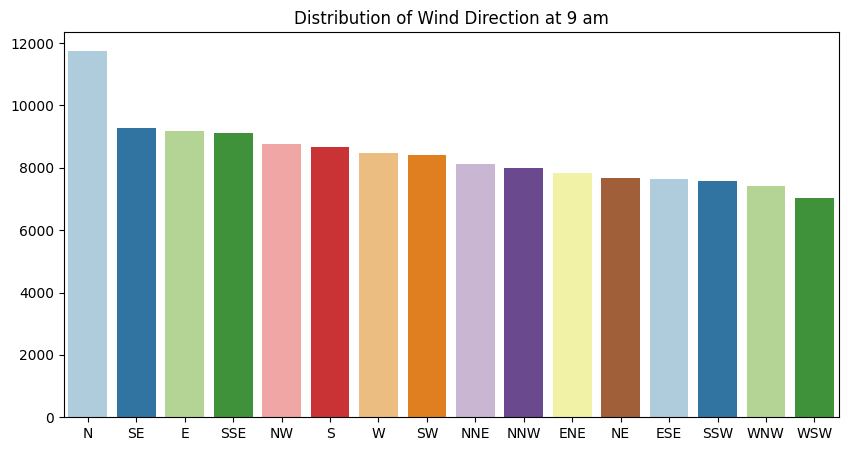

In [17]:
fig = plt.gcf()
fig.set_size_inches((10, 5));

sns.barplot(x = df['WindDir9am'].value_counts().index,
            y = df['WindDir9am'].value_counts().values,
            palette = sns.color_palette("Paired")).\
            set_title("Distribution of Wind Direction at 9 am");

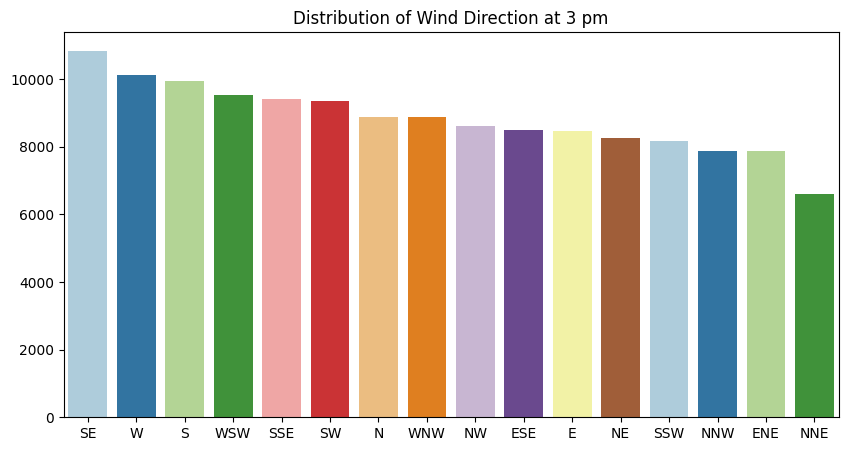

In [18]:
fig = plt.gcf()
fig.set_size_inches((10, 5));

sns.barplot(x = df['WindDir3pm'].value_counts().index,
            y = df['WindDir3pm'].value_counts().values,
            palette = sns.color_palette("Paired")).\
            set_title("Distribution of Wind Direction at 3 pm");

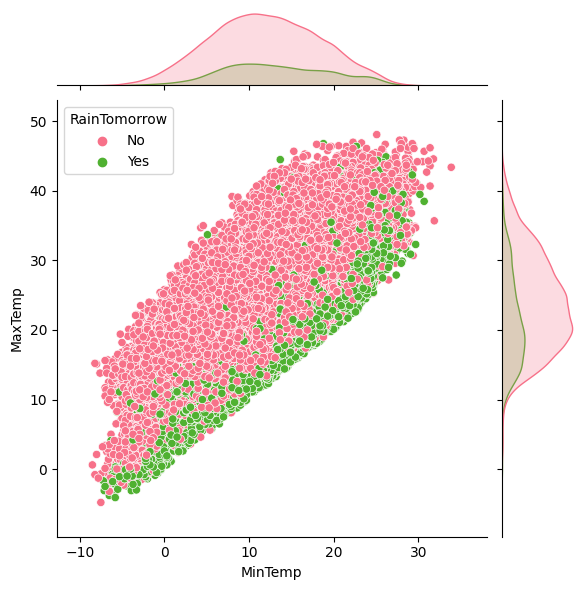

In [19]:
sns.jointplot(x = 'MinTemp', y = 'MaxTemp', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

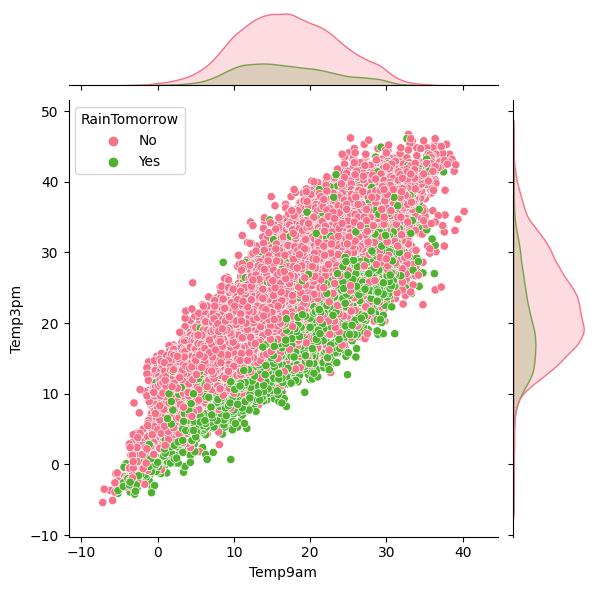

In [20]:
sns.jointplot(x = 'Temp9am', y = 'Temp3pm', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

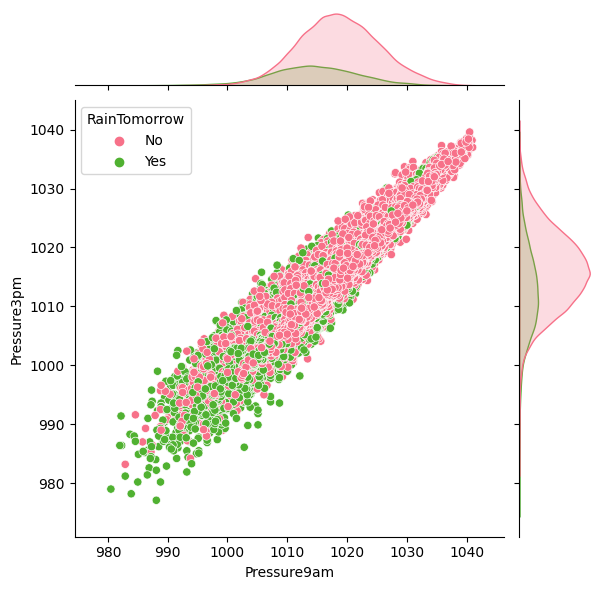

In [21]:
sns.jointplot(x = 'Pressure9am', y = 'Pressure3pm', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


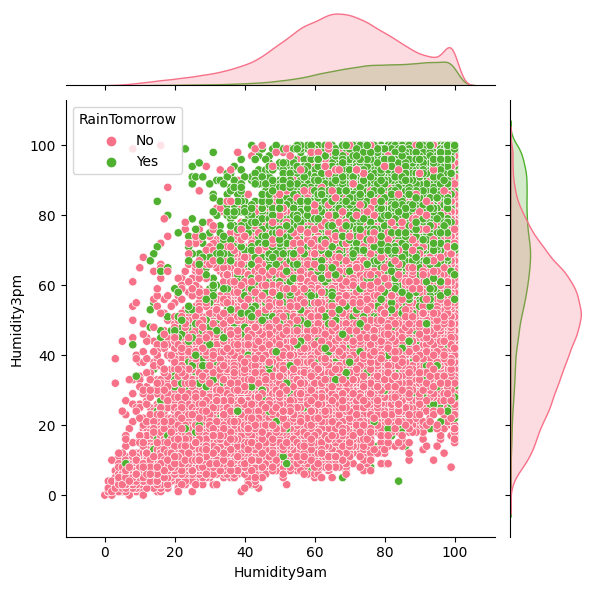

In [22]:
sns.jointplot(x = 'Humidity9am', y = 'Humidity3pm', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

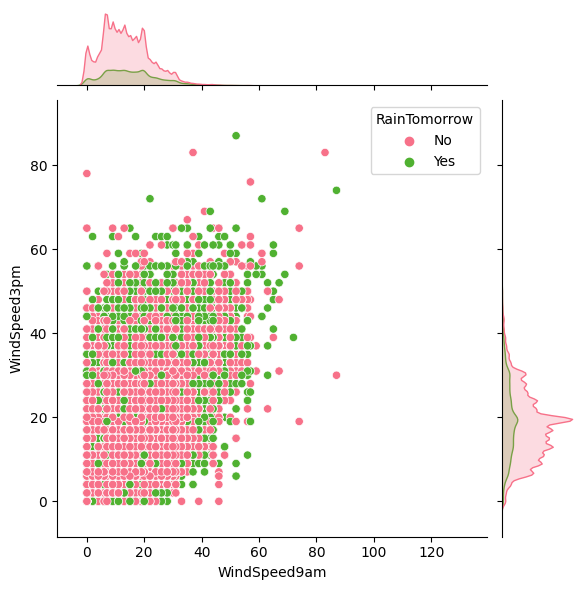

In [23]:
sns.jointplot(x = 'WindSpeed9am', y = 'WindSpeed3pm', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

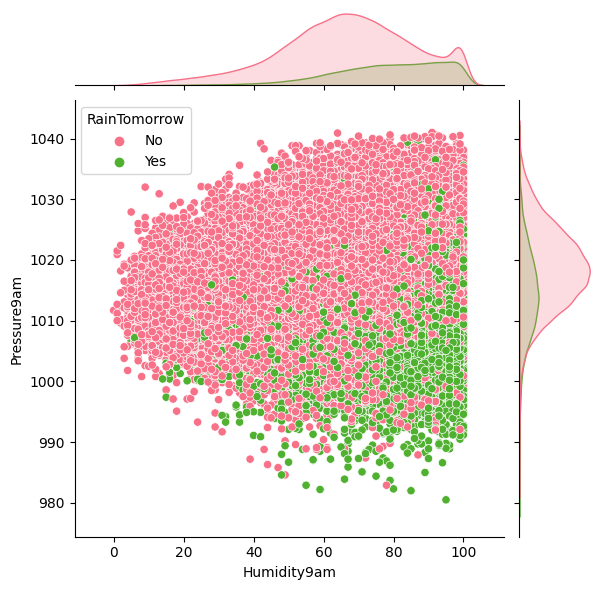

In [24]:
sns.jointplot(x = 'Humidity9am', y = 'Pressure9am', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

<ipython-input-25-5a44b7ddde0c>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = sns.color_palette("coolwarm", as_cmap = True));


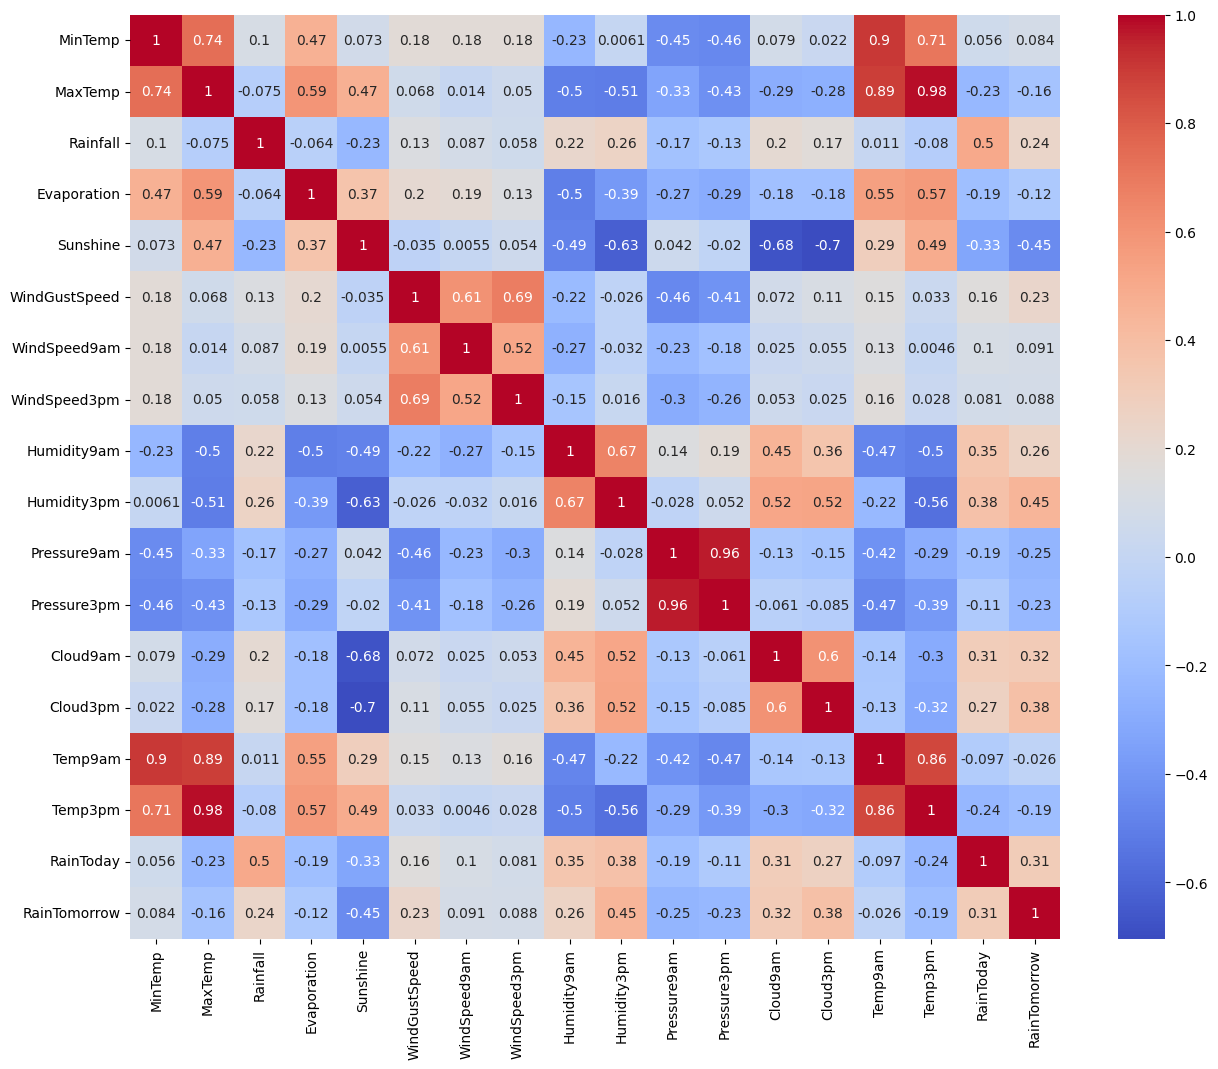

In [25]:
fig = plt.gcf()
fig.set_size_inches((15, 12));

df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace  = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

sns.heatmap(df.corr(), annot = True, cmap = sns.color_palette("coolwarm", as_cmap = True));

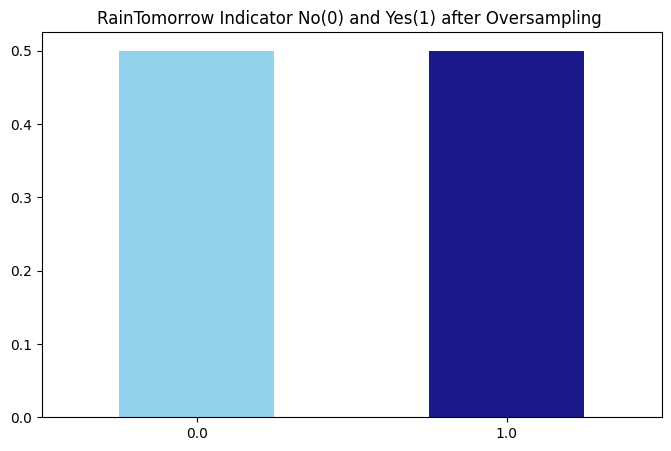

In [26]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df = pd.concat([no, yes_oversampled])


fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling ')
plt.show()

In [27]:
X = df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = df.iloc[:,-1].values

In [28]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 0.0]
 ['Albury' 7.4 25.1 ... 17.2 24.3 0.0]
 ['Albury' 12.9 25.7 ... 21.0 23.2 0.0]
 ...
 ['Cairns' 24.8 31.5 ... 28.7 30.3 0.0]
 ['Ballarat' 4.2 7.9 ... 4.6 6.8 1.0]
 ['Richmond' 19.5 31.6 ... 22.5 31.1 0.0]]


In [29]:
print(Y)

[0. 0. 0. ... 1. 1. 1.]


In [30]:
Y=Y.reshape(-1,1)
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [31]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent') # Fill the missing values with Mode
X = imp.fit_transform(X)
Y = imp.fit_transform(Y)

In [32]:
X

array([['Albury', 13.4, 22.9, ..., 16.9, 21.8, 0.0],
       ['Albury', 7.4, 25.1, ..., 17.2, 24.3, 0.0],
       ['Albury', 12.9, 25.7, ..., 21.0, 23.2, 0.0],
       ...,
       ['Cairns', 24.8, 31.5, ..., 28.7, 30.3, 0.0],
       ['Ballarat', 4.2, 7.9, ..., 4.6, 6.8, 1.0],
       ['Richmond', 19.5, 31.6, ..., 22.5, 31.1, 0.0]], dtype=object)

In [33]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [34]:
from sklearn.preprocessing import LabelEncoder

le1=LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])

le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])

le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])

le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])

le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])

le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

In [35]:
X

array([[2, 13.4, 22.9, ..., 16.9, 21.8, 0],
       [2, 7.4, 25.1, ..., 17.2, 24.3, 0],
       [2, 12.9, 25.7, ..., 21.0, 23.2, 0],
       ...,
       [8, 24.8, 31.5, ..., 28.7, 30.3, 0],
       [5, 4.2, 7.9, ..., 4.6, 6.8, 1],
       [34, 19.5, 31.6, ..., 22.5, 31.1, 0]], dtype=object)

In [36]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [38]:
X

array([[-1.5296304 ,  0.13989127,  0.06345497, ...,  0.00998997,
         0.15393456, -0.66291173],
       [-1.5296304 , -0.80100322,  0.37304035, ...,  0.05663083,
         0.51760514, -0.66291173],
       [-1.5296304 ,  0.0614834 ,  0.45747273, ...,  0.64741511,
         0.35759009, -0.66291173],
       ...,
       [-1.10665539,  1.9275908 ,  1.27365237, ...,  1.8445306 ,
         1.39041454, -0.66291173],
       [-1.31814289, -1.30281361, -2.04735446, ..., -1.90228544,
        -2.02808893,  1.50849646],
       [ 0.72623631,  1.09646733,  1.28772444, ...,  0.88061942,
         1.50678913, -0.66291173]])

In [39]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [91]:
print(X_train)

[[ 0.02127796  1.34737253  1.37215681 ...  1.11382374  0.11029409
  -0.66291173]
 [ 1.50169049 -0.33055597 -0.58385992 ... -0.79845166 -0.74796848
   1.50849646]
 [ 0.37375714  0.72010954  1.97725552 ...  1.19155851  2.10320888
  -0.66291173]
 ...
 [ 0.65574047  0.2496623   0.3167521  ...  1.08272983  0.00846633
  -0.66291173]
 [-1.31814289 -0.58146117 -0.6682923  ... -0.67407603 -0.60250025
  -0.66291173]
 [ 0.02127796  0.17125442 -0.5557158  ... -0.05219785 -0.39884472
   1.50849646]]


In [92]:
print(Y_train)

[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]


In [93]:
Y_test.shape

(44127, 1)

In [94]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  

classifier_lr = LogisticRegression(random_state=0)  
classifier_lr.fit(X_train, Y_train)  

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [95]:
y_pred_lr = classifier_lr.predict(X_test)

In [96]:
y_pred_lr.shape

(44127,)

In [97]:
y_pred_lr = y_pred_lr.reshape((44127, 1))

In [98]:
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_lr), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])

In [99]:
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt

,RainTomorrow,Prediction
0,No,Yes
1,Yes,Yes
2,No,Yes
3,No,Yes
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,Yes
44124,No,No
44125,Yes,Yes


In [100]:
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(Y_test, y_pred_lr)

In [101]:
print(accuracy_lr)

0.7745824551861672


In [102]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_lr = confusion_matrix(Y_test, y_pred_lr)

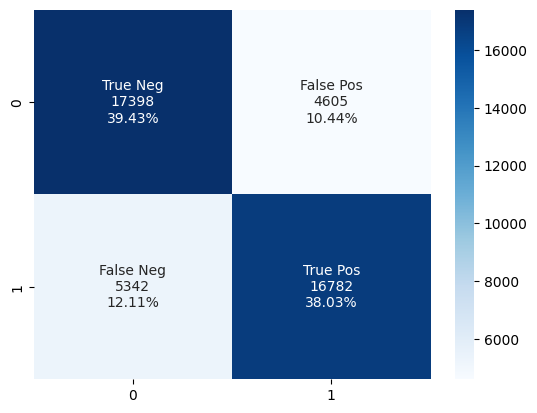

In [103]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lr.flatten()/np.sum(cm_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lr, annot=labels, fmt="", cmap='Blues');

In [104]:
#Fitting RandomForestClassifier to the model
from sklearn.ensemble import  RandomForestClassifier

classifier_rfs = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_rfs.fit(X_train, Y_train)

<ipython-input-104-85b0bec2b5ed>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rfs.fit(X_train, Y_train)


RandomForestClassifier(random_state=0)

In [105]:
y_pred_rfs = classifier_rfs.predict(X_test)

In [106]:
y_pred_rfs = y_pred_rfs.reshape((44127, 1))

In [107]:
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_rfs), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])

In [108]:
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt

,RainTomorrow,Prediction
0,No,Yes
1,Yes,Yes
2,No,No
3,No,Yes
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,Yes
44124,No,No
44125,Yes,Yes


In [109]:
accuracy_rfs = accuracy_score(Y_test, y_pred_rfs)

In [110]:
accuracy_rfs

0.9471751988578422

In [111]:
#Creating the Confusion matrix  

from sklearn.metrics import confusion_matrix  
cm_rfs = confusion_matrix(Y_test, y_pred_rfs)  

<Axes: >

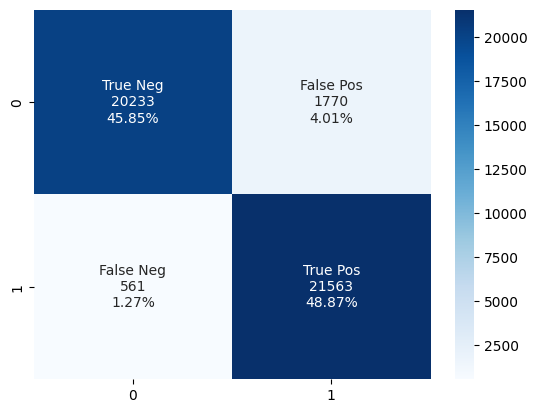

In [112]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_rfs.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_rfs.flatten()/np.sum(cm_rfs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rfs, annot=labels, fmt="", cmap='Blues')

In [113]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  

classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier_dt.fit(X_train, Y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [114]:
y_pred_dt = classifier_dt.predict(X_test)

In [115]:
y_pred_dt = y_pred_dt.reshape((44127, 1))

In [116]:
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_dt), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])

In [117]:
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt

,RainTomorrow,Prediction
0,No,No
1,Yes,Yes
2,No,No
3,No,Yes
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,Yes
44124,No,No
44125,Yes,Yes


In [118]:
accuracy_dt = accuracy_score(Y_test, y_pred_dt)

In [119]:
print(accuracy_dt)

0.909307226867904


In [120]:
from sklearn.metrics import confusion_matrix  
cm_dt = confusion_matrix(Y_test, y_pred_dt)  

<Axes: >

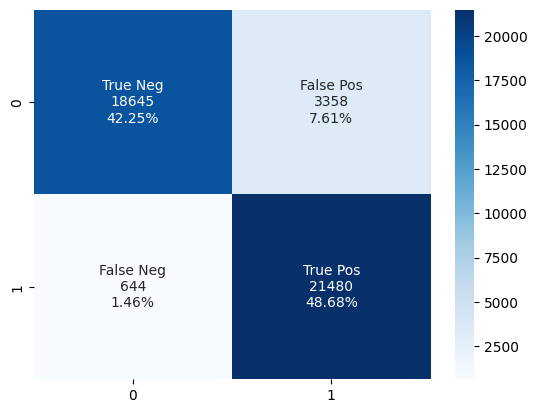

In [121]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt, annot=labels, fmt="", cmap='Blues')

In [122]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(random_state = 0)
classifier_lgbm.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(random_state=0)

In [123]:
y_pred_lgbm = classifier_lgbm.predict(X_test)

In [124]:
y_pred_lgbm = y_pred_lgbm.reshape((44127, 1))

In [139]:
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_lgbm), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])

In [140]:
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt

,RainTomorrow,Prediction
0,No,Yes
1,Yes,Yes
2,No,Yes
3,No,Yes
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,No
44124,No,No
44125,Yes,Yes


In [141]:
accuracy_lgbm = accuracy_score(Y_test, y_pred_lgbm)

In [142]:
print(accuracy_lgbm)

0.807714097944569


In [143]:
from sklearn.metrics import confusion_matrix  
cm_lgbm = confusion_matrix(Y_test, y_pred_lgbm)  

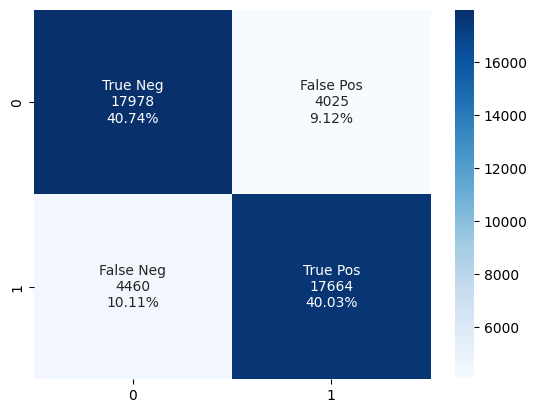

In [144]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lgbm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lgbm.flatten()/np.sum(cm_lgbm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lgbm, annot=labels, fmt="", cmap='Blues');

In [145]:
from sklearn.naive_bayes import GaussianNB

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [146]:
y_pred_nb = classifier_nb.predict(X_test)

In [147]:
y_pred_nb = y_pred_nb.reshape((44127, 1))

In [148]:
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_nb), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])

In [149]:
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt

,RainTomorrow,Prediction
0,No,Yes
1,Yes,Yes
2,No,Yes
3,No,Yes
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,No
44124,No,No
44125,Yes,Yes


In [150]:
accuracy_nb = accuracy_score(Y_test, y_pred_nb)

In [151]:
print(accuracy_nb)

0.7405896616583951


In [152]:
from sklearn.metrics import confusion_matrix  
cm_nb = confusion_matrix(Y_test, y_pred_nb)  

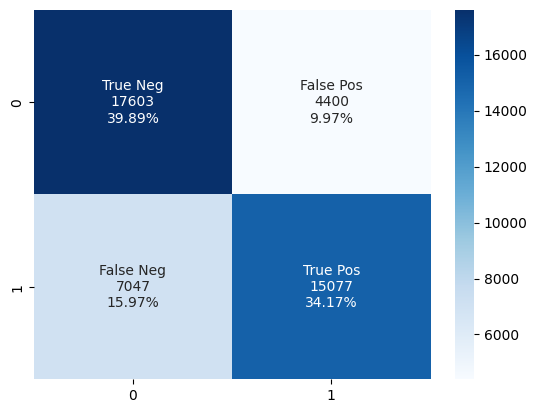

In [153]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_nb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_nb.flatten()/np.sum(cm_nb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_nb, annot=labels, fmt="", cmap='Blues');

In [127]:
#Fitting SVM classifier to the training set  
from sklearn import preprocessing
from sklearn.svm import LinearSVC

classifier_svc = LinearSVC(random_state=0)  
classifier_svc.fit(X_train, Y_train)  

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

In [128]:
y_pred_svc = classifier_svc.predict(X_test)

In [129]:
y_pred_svc = y_pred_svc.reshape((44127, 1))

In [130]:
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_dt), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])

In [131]:
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

dt

,RainTomorrow,Prediction
0,No,No
1,Yes,Yes
2,No,No
3,No,Yes
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,Yes
44124,No,No
44125,Yes,Yes


In [133]:
accuracy_svc = accuracy_score(Y_test, y_pred_svc)

In [134]:
print(accuracy_svc)

0.7752849729190745


In [177]:
#Creating the Confusion matrix  

from sklearn.metrics import confusion_matrix  
cm_svc = confusion_matrix(Y_test, y_pred_svc)  

<Axes: >

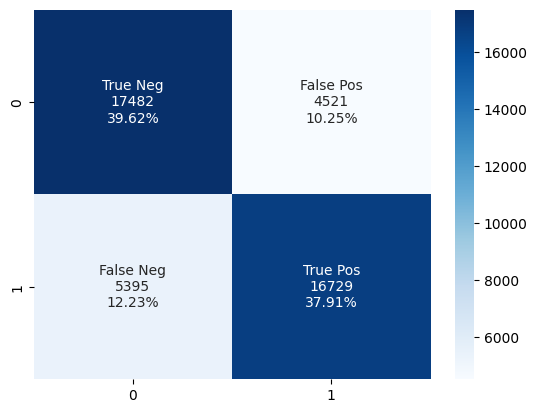

In [178]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_svc.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_svc.flatten()/np.sum(cm_svc)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_svc, annot=labels, fmt="", cmap='Blues')

In [160]:
#Fitting KNN to the training set 
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier()  
classifier_knn.fit(X_train, Y_train)  

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [161]:
y_pred_knn = classifier_knn.predict(X_test)

In [162]:
y_pred_knn = y_pred_knn.reshape((44127, 1))

In [163]:
dt = pd.DataFrame(np.concatenate((Y_test, y_pred_rfs), axis = 1), 
                  columns = ["RainTomorrow", "Prediction"])

In [164]:
dt['RainTomorrow'].replace({0: 'No', 1: 'Yes'}, inplace  = True)
dt['Prediction'].replace({0: 'No', 1: 'Yes'}, inplace  = True)

dt

,RainTomorrow,Prediction
0,No,Yes
1,Yes,Yes
2,No,No
3,No,Yes
4,Yes,Yes
...,...,...
44122,No,No
44123,Yes,Yes
44124,No,No
44125,Yes,Yes


In [166]:
accuracy_knn = accuracy_score(Y_test, y_pred_knn)

In [167]:
accuracy_knn

0.8290842341423618

In [175]:
#Creating the Confusion matrix  

from sklearn.metrics import confusion_matrix  
cm_knn = confusion_matrix(Y_test, y_pred_knn)  

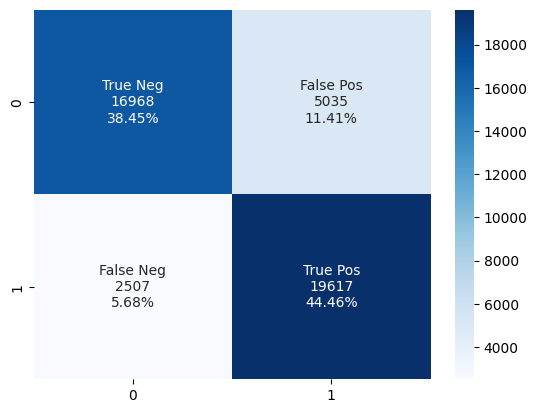

In [176]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_knn.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_knn.flatten()/np.sum(cm_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_knn, annot=labels, fmt="", cmap='Blues');

In [169]:
accuracy_dict = {"Logistic Regression": accuracy_lr,
                 "Random Forest": accuracy_rfs,
                 "Decision Trees": accuracy_dt,
                 "LightGBM": accuracy_lgbm,
                 "Naive Bayes": accuracy_nb,
                 "Linear SVC": accuracy_svc,
                 "K Nearest Neighbors": accuracy_knn}

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.774582
Random Forest,0.947175
Decision Trees,0.909307
LightGBM,0.807714
Naive Bayes,0.740590
Linear SVC,0.775285
K Nearest Neighbors,0.829084


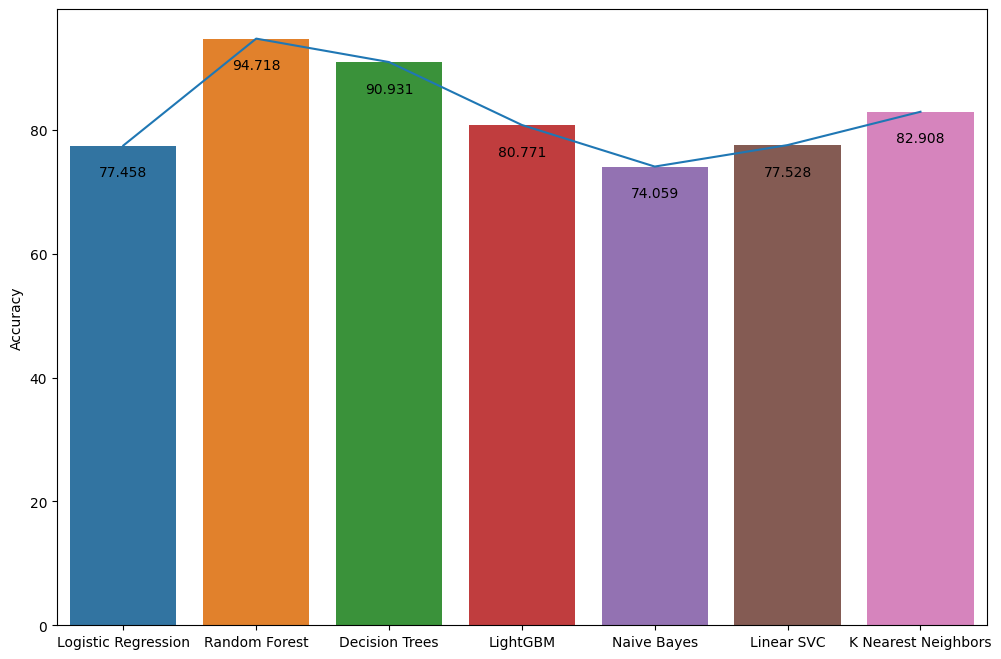

In [170]:
fig = plt.gcf();
fig.set_size_inches(12, 8);

sns.lineplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);
sns.barplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);

for i, val in enumerate(accuracy_df.index):
    y = round(accuracy_df.loc[val].sum()*100, 3)
    plt.text(i, y-5, str(y), ha = "center")